# Construction des modèles

## Importation des données

In [1]:
import pandas as pd

df = pd.read_csv("data_src/inssurance.csv")

## Traitement des données

In [2]:
X = pd.get_dummies(df.drop("charges", axis=1), drop_first=True)
y = df["charges"]

X = X.astype(float)

## Séparation des données entrainements et de tests

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

## Création des modèles

In [4]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

## Entrainement des modèles

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2, "y_pred": y_pred}

## Affichage des résultats et performances des modèles

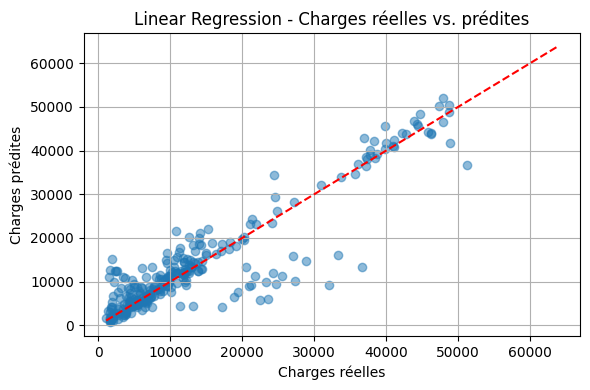

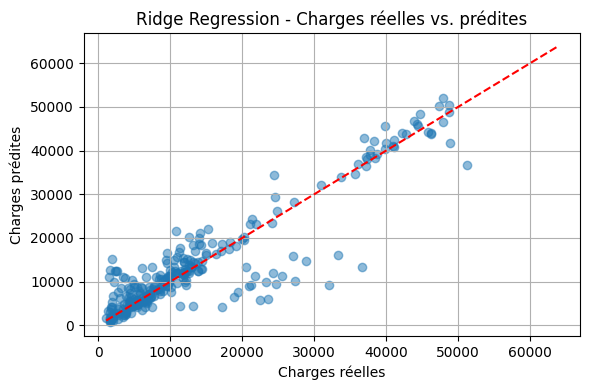

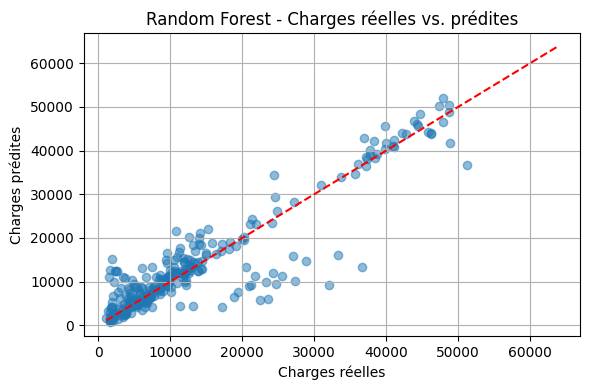

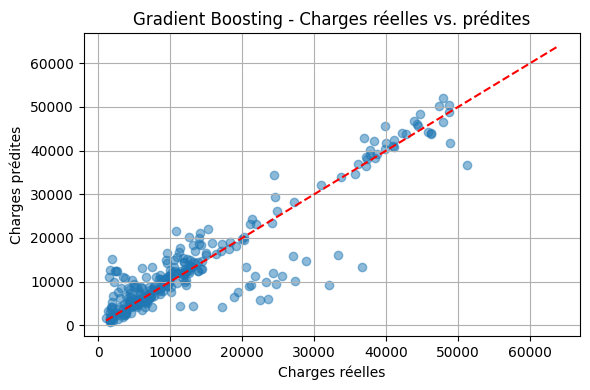

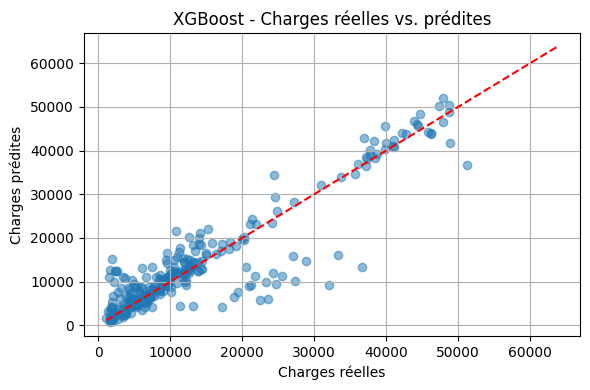

Résultats comparés :
                           MAE         RMSE        R2
Gradient Boosting  2497.900380  4455.887005  0.876132
Random Forest      2625.760558  4702.200849  0.862060
XGBoost            3046.697739  5116.056466  0.836710
Linear Regression  4008.515484  5894.267291  0.783255
Ridge Regression   4022.122844  5900.794710  0.782775


In [6]:
from matplotlib import pyplot as plt

for name, result in results.items():
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.title(f"{name} - Charges réelles vs. prédites")
    plt.xlabel("Charges réelles")
    plt.ylabel("Charges prédites")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

cleaned_results = {
    model: {k: v for k, v in metrics.items() if k != "y_pred"}
    for model, metrics in results.items()
}

results_df = pd.DataFrame(cleaned_results).T
print("Résultats comparés :")
print(results_df.sort_values("R2", ascending=False))


## Sauvegarde des modèles et colonnes

In [7]:
import joblib
import json

columns = list(X.columns)

for name, model in models.items():
    model_id = name.lower().replace(" ", "_")

    model_path = f"models/{model_id}.pkl"
    joblib.dump(model, model_path)
    print(f"Modèle {name} sauvegardé sous {model_path}")

    benchmark_path = f"models/{model_id}_benchmark.json"
    with open(benchmark_path, "w") as f:
        json.dump(cleaned_results[name], f, indent=2)
        print(f"Métriques sauvegardées dans {benchmark_path}")

    columns_path = f"models/{model_id}_columns.json"
    with open(columns_path, "w") as f:
        json.dump(columns, f)
        print(f"Colonnes sauvegardées dans {columns_path}")


Modèle Linear Regression sauvegardé sous models/linear_regression.pkl
Métriques sauvegardées dans models/linear_regression_benchmark.json
Colonnes sauvegardées dans models/linear_regression_columns.json
Modèle Ridge Regression sauvegardé sous models/ridge_regression.pkl
Métriques sauvegardées dans models/ridge_regression_benchmark.json
Colonnes sauvegardées dans models/ridge_regression_columns.json
Modèle Random Forest sauvegardé sous models/random_forest.pkl
Métriques sauvegardées dans models/random_forest_benchmark.json
Colonnes sauvegardées dans models/random_forest_columns.json
Modèle Gradient Boosting sauvegardé sous models/gradient_boosting.pkl
Métriques sauvegardées dans models/gradient_boosting_benchmark.json
Colonnes sauvegardées dans models/gradient_boosting_columns.json
Modèle XGBoost sauvegardé sous models/xgboost.pkl
Métriques sauvegardées dans models/xgboost_benchmark.json
Colonnes sauvegardées dans models/xgboost_columns.json
